### Bank Personal Loan Prediction

In [92]:
##import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
%matplotlib inline


In [4]:
#Reading Data
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df_loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv", na_values = missing_values) #df => dataframe
type(df_loan) #pandas.core.frame.DataFrame
print(df_loan.shape) # shape=> rows,columns
df_loan.head() #inspecting first 5 rows

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### EDA

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df_loan.describe().transpose()#summary statistics


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
#Data cleaning
df_loan.isna().sum() #no null or N/A values as isnull is 0

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Check for the null values 

df_loan.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [10]:
df_loan = df_loan.drop("ID", axis = 1) ## ID feature is imaterial and hence dropping.

In [11]:
## check correlation for better feature selection
df_loan.corr()

# Based on below findings we can inference that :-
    # "Age and Income" & "Income-Loan-CCAvg-CD Account" are highly correlated

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


## Feature Selection

In [21]:
## Need to select best fetures which supports prediction based on feature Score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Create feature and target variable for Classification problem
X_clf=df_loan.drop(['Personal Loan'],axis = 1) # features
y_clf=df_loan['Personal Loan'] #target


In [22]:
X_clf_new=SelectKBest(score_func=f_classif,k=2).fit_transform(X_clf,y_clf)

In [30]:
X_clf.shape  #(5000, 12)
X_clf_new.shape # considers only 2 features

(5000, 2)

### Data Distribution

In [32]:
df_loan['Personal Loan'].value_counts(normalize= True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [33]:
## Taget variable has class imbalance 0-90% and hence we need to take other factors into consideration.

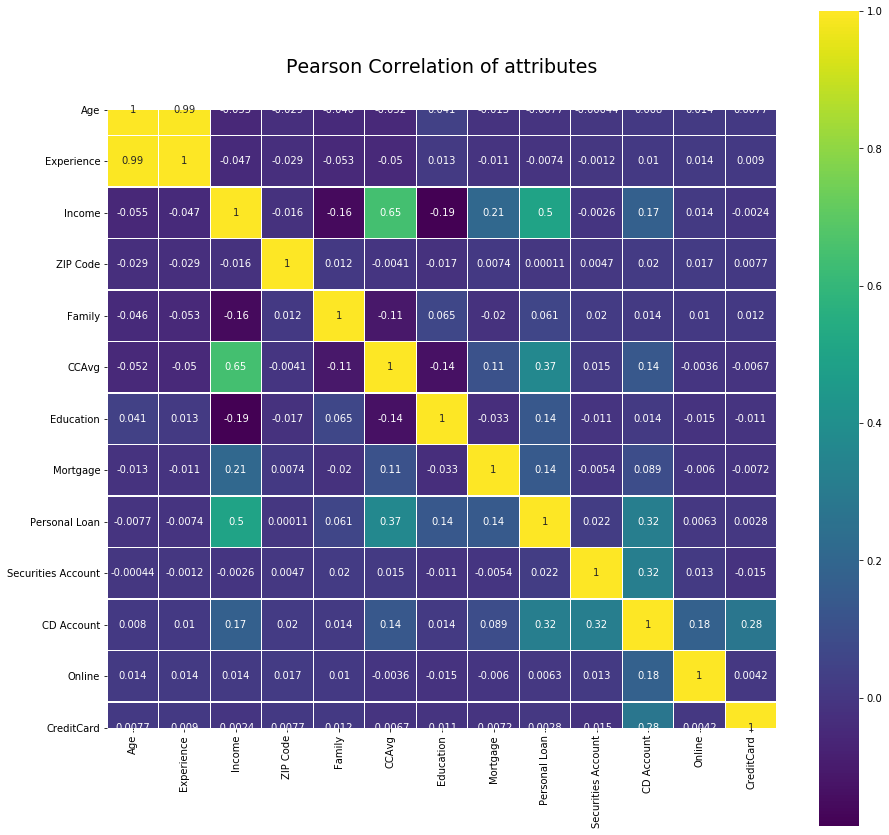

In [34]:
#1. Correlation Analysis and Bivariate Classification
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df_loan.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between many two variables.
#However # "Age and Income" & "Age and Experiance" & Income-Loan-CCAvg-CD Account" are highly correlated

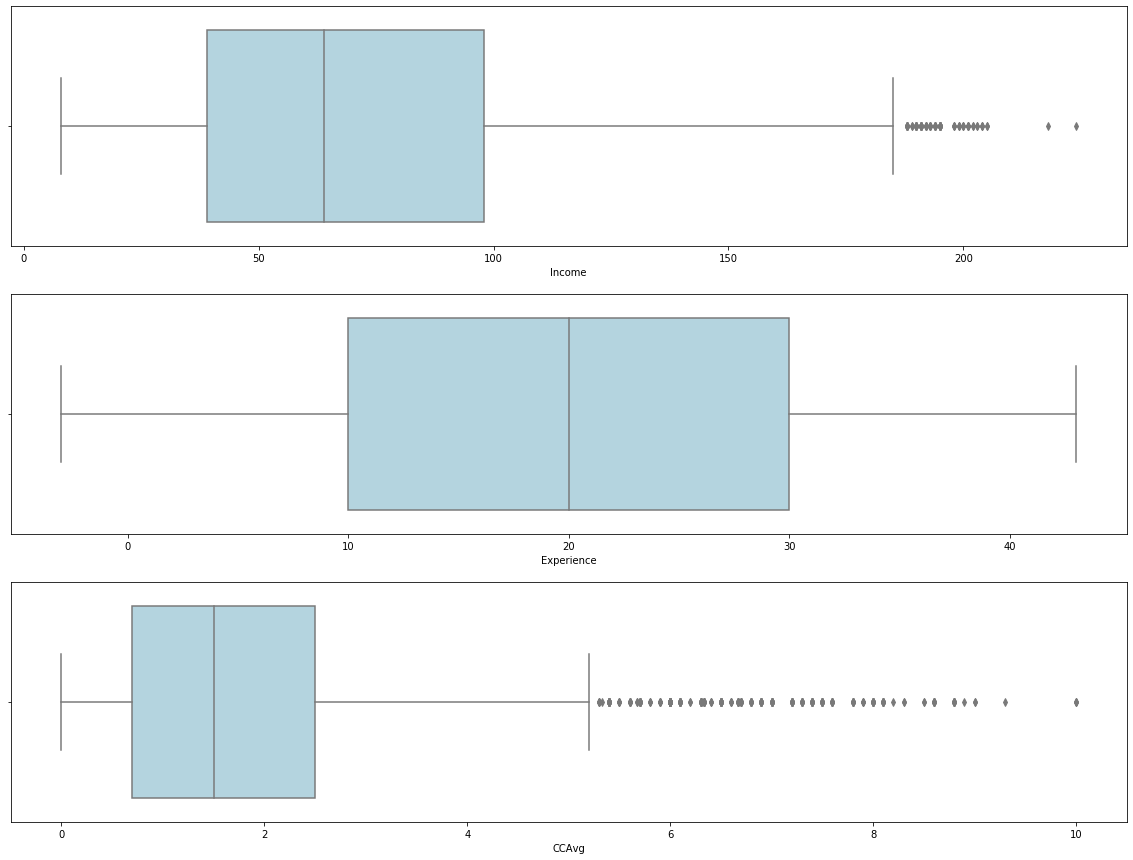

In [84]:
#2.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df_loan.Income, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df_loan.Experience, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df_loan.CCAvg, color='lightblue')

In [ ]:
## From above Boxplot , we can infere that Income and CCAvg has outliers while Experience is evenly distributed.

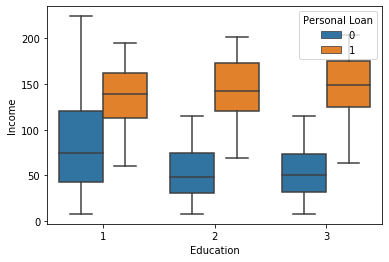

In [87]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df_loan)
#Observation
#The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans 
#have the same income distribution regardless of the education level.

Text(0.5, 0, 'CCAvg')

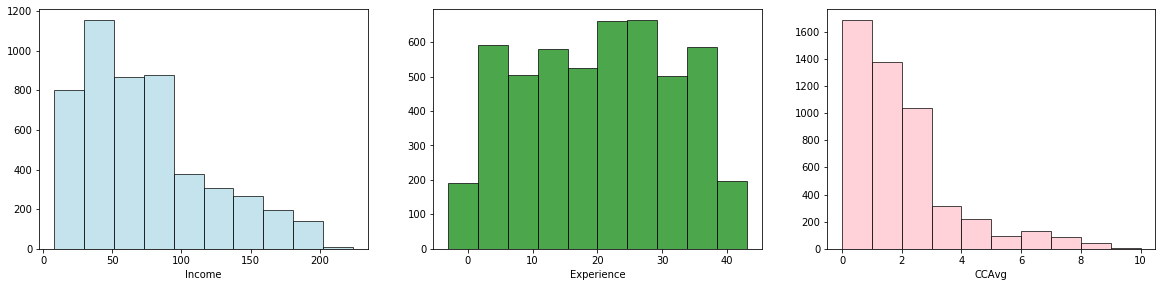

In [40]:
#3.Histogram 
#Distribution of bmi,age and charges
#Data Visualisation

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_loan.Income, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(3,3,2)
plt.hist(df_loan.Experience, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(3,3,3)
plt.hist(df_loan.CCAvg, color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

#Experience is normally distributed, Income and CCAvg-right skewed.

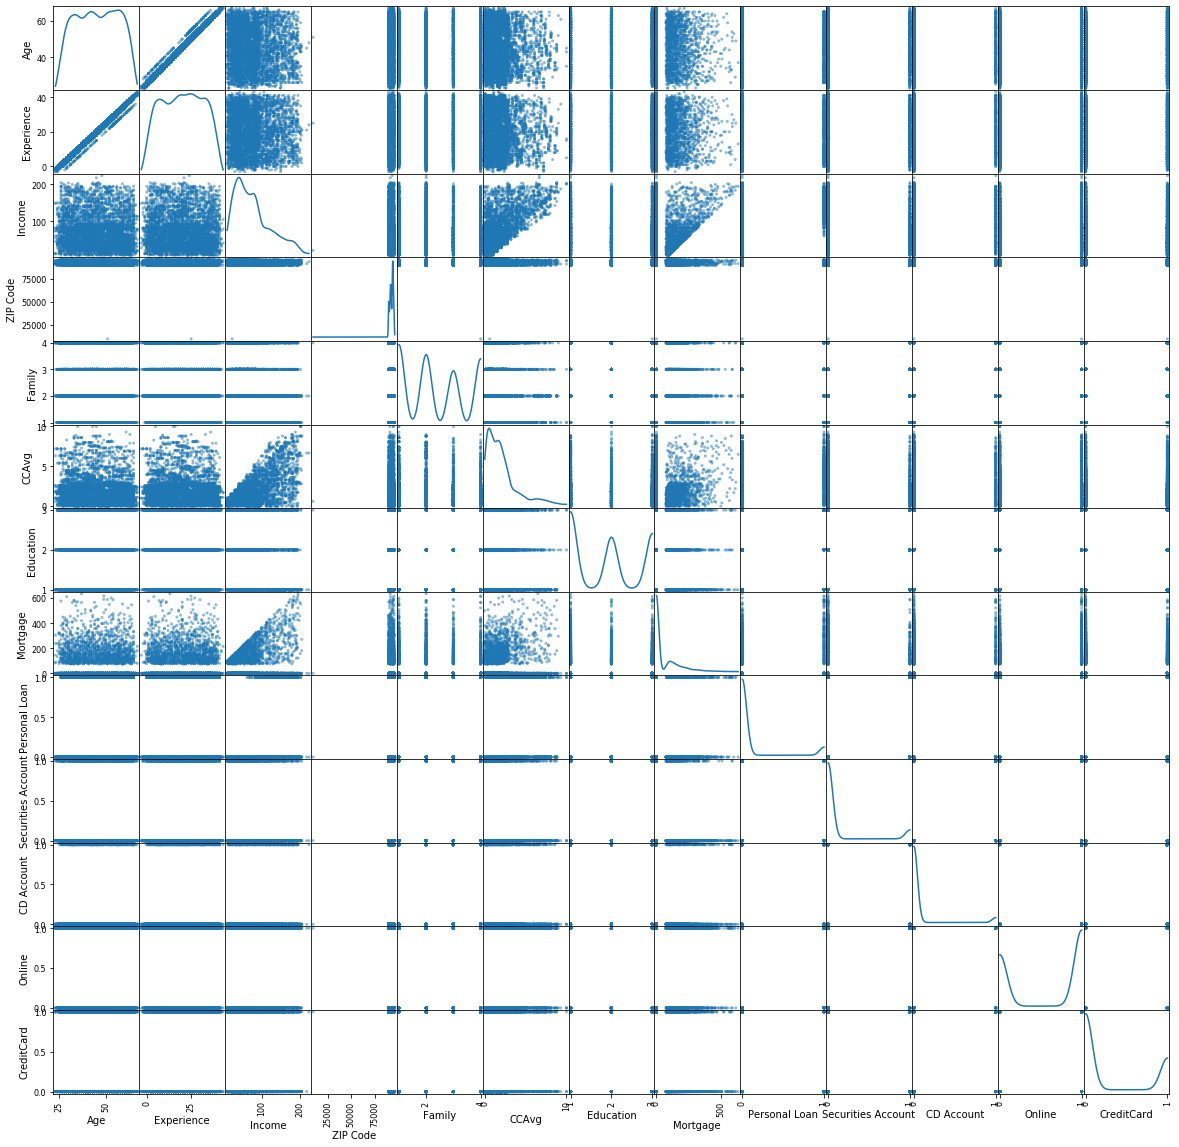

In [43]:
##4. Plot a scatter matrix
spd = pd.plotting.scatter_matrix(df_loan, figsize=(20,20), diagonal="kde")

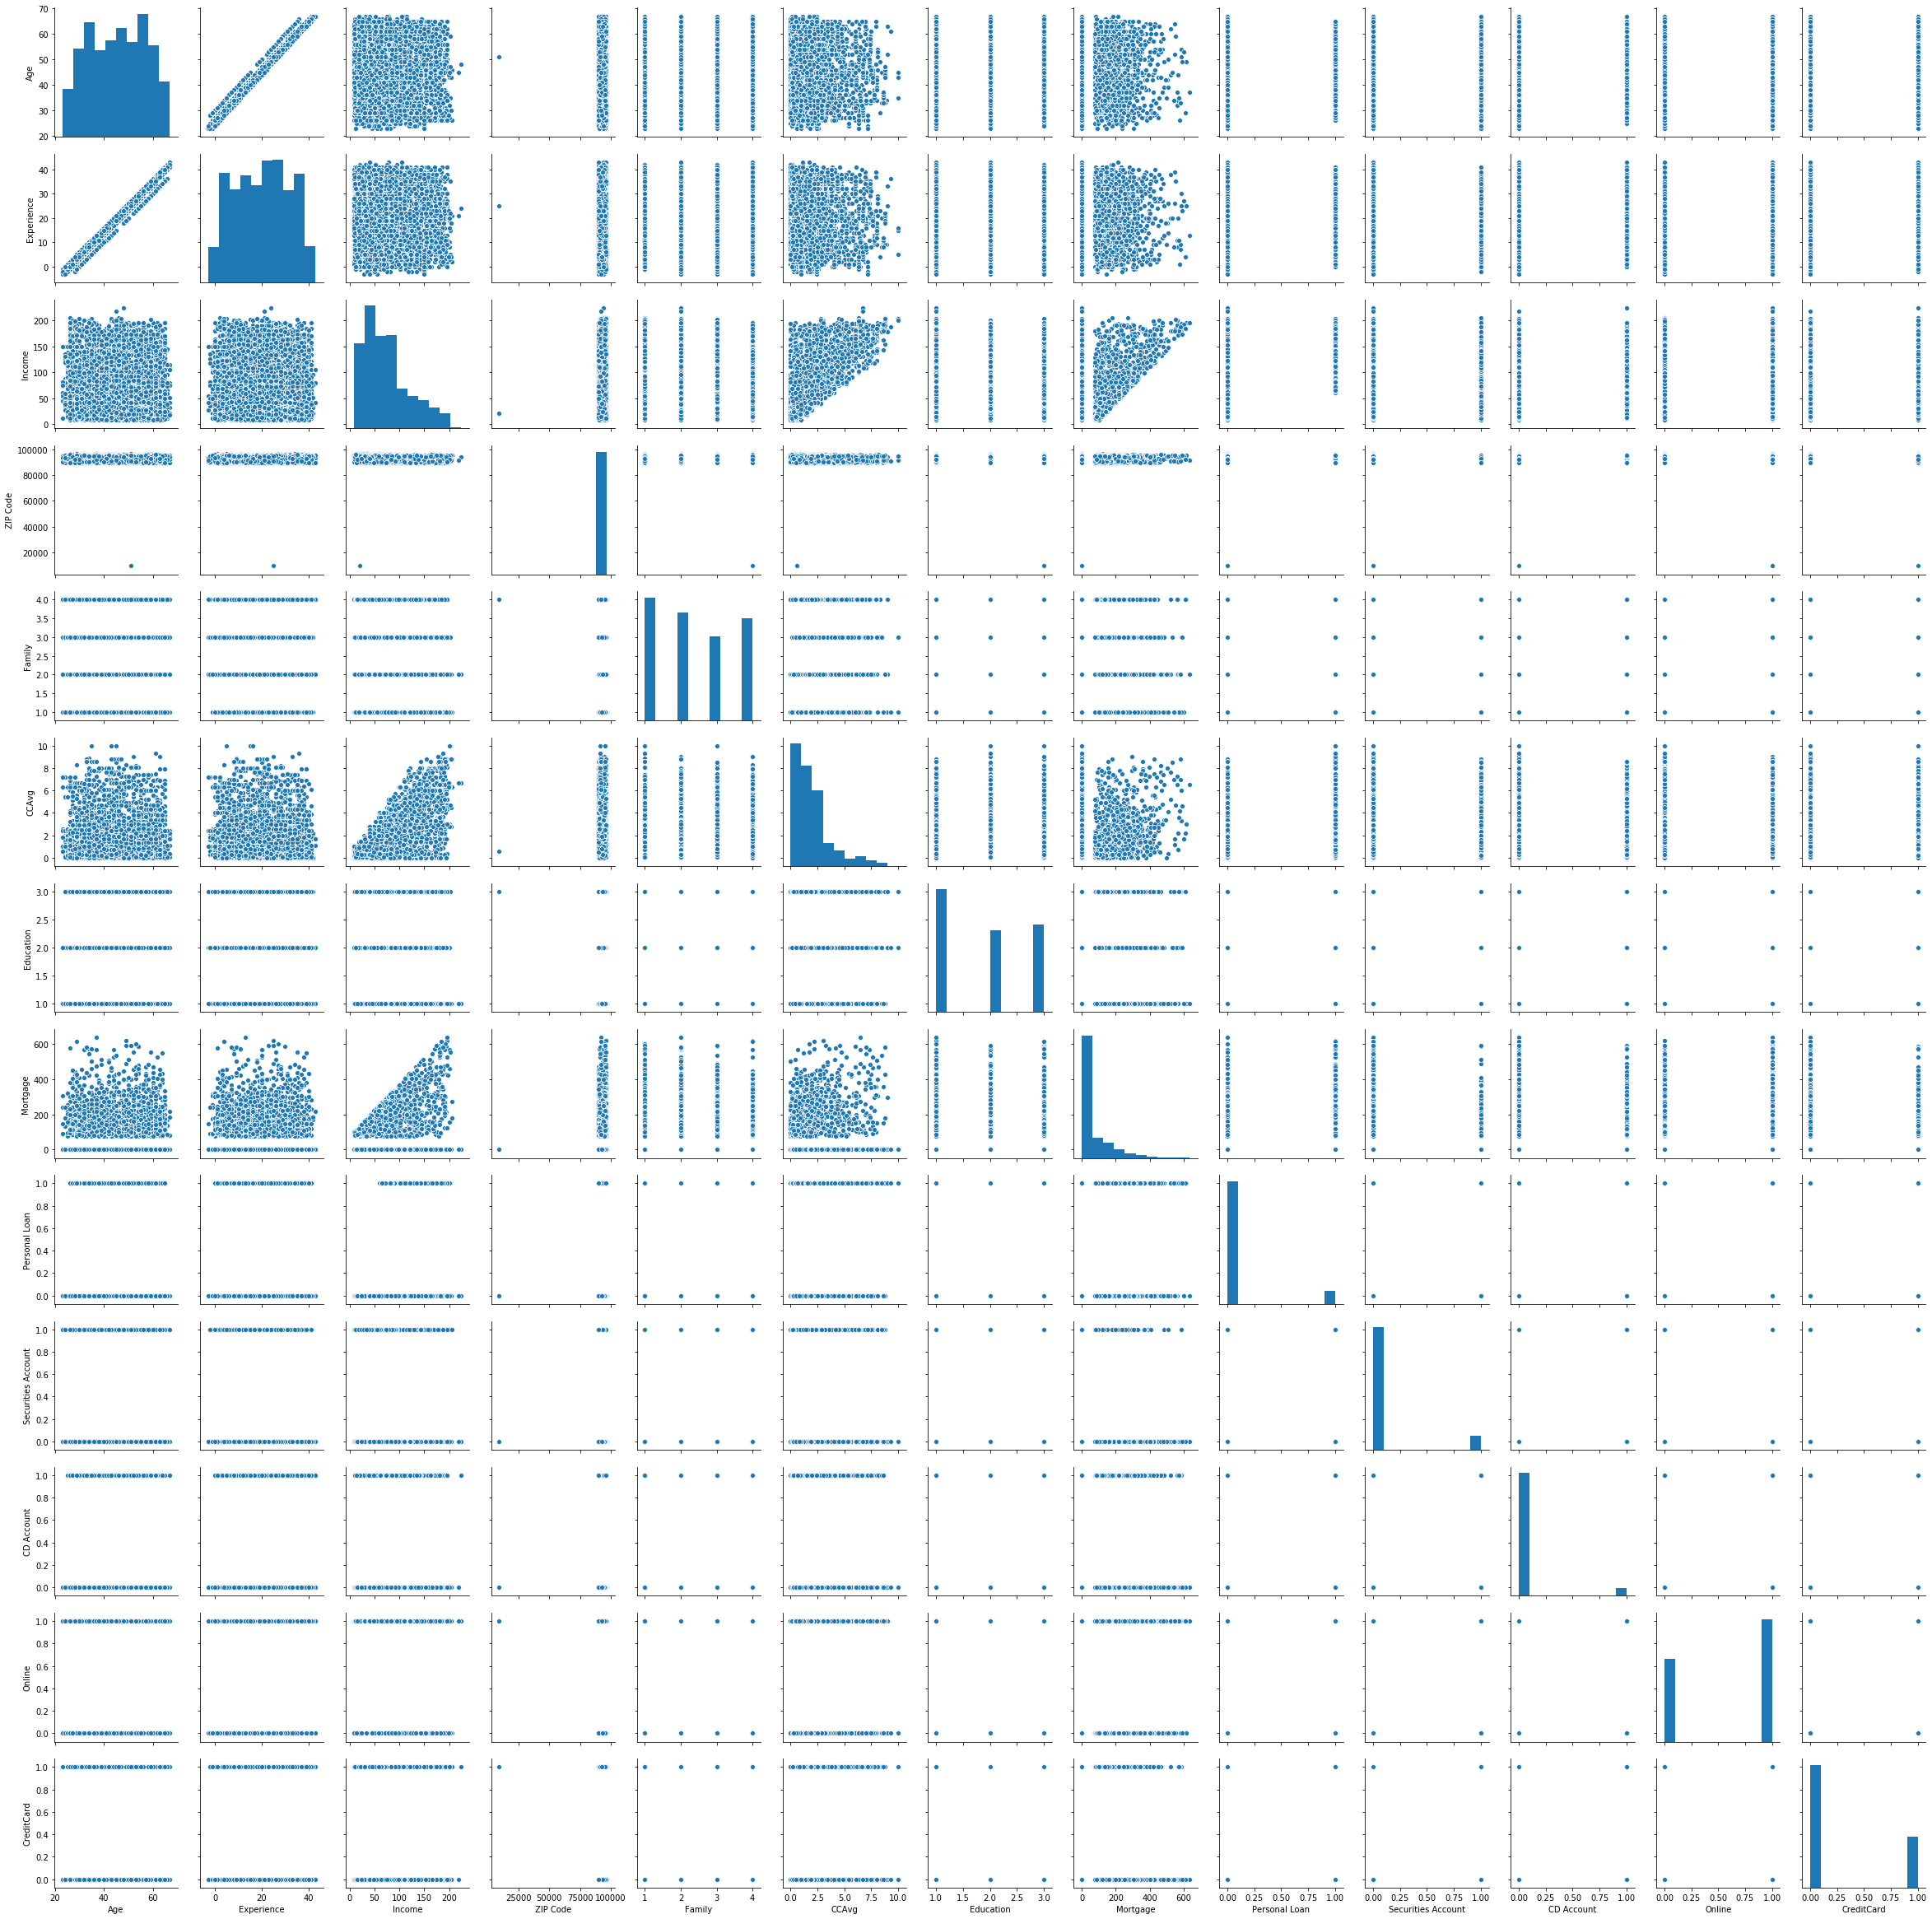

In [46]:
##5.Pair Plot
#Pair plot that includes all the columns of the data frame
#sns.pairplot(data,hue = 'Family')

# label_encoder object knows how to understand word labels. 
df_loan_encoded = copy.deepcopy(df_loan)
df_loan_encoded.loc[:,['Securities Account', 'CD Account', 'Online','CreditCard']] = df_loan_encoded.loc[:,['Securities Account', 'CD Account', 'Online','CreditCard']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_loan_encoded)  #pairplot

plt.show()

In [47]:
## from pair plot, we can infere that Age and Experience are linear.
## Age and Income following gausian curve (approx.)

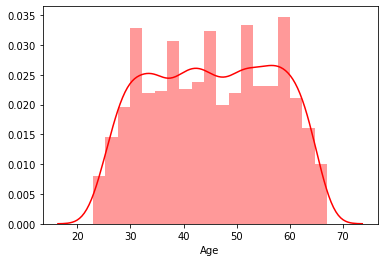

In [83]:
sns.distplot( df_loan['Age'], color = 'r')
#Observation
#Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 
#5 to 35 years and most earn an income between 10K to 100K.

### Target Column Distribution

In [48]:
# 1. Using Value count
df_loan['Personal Loan'].value_counts(normalize= True)
## Taget variable has class imbalance 0-90% and hence we need to take other factors into consideration.

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB0636DB08>]],
      dtype=object)

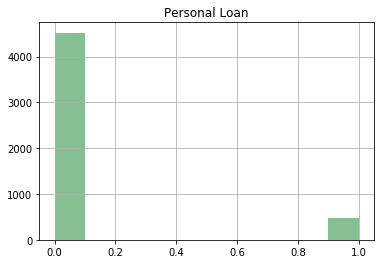

In [50]:
# 2. Histogram giving count
df_loan.hist(column='Personal Loan',color='#86bf91')
# Fig shows uneven distribution. Probability of No loan prediction is high. 

### Split the data into training and test set in the ratio of 70:30 respectively

In [52]:
from sklearn.model_selection import train_test_split
X = df_loan.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df_loan['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [54]:
# check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.000528 -0.00201  0.036089 -0.000066  0.015165  0.009454  0.016447   

          7         8         9        10        11  intercept  
0  0.000833  0.000534  0.004681 -0.000177 -0.000067  -0.000106  


In [56]:
model_score = model.score(x_test, y_test)
print(model_score)

## Model score =  90 %

0.9073333333333333


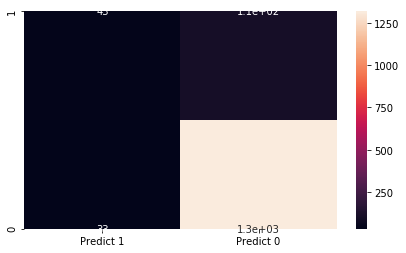

In [63]:
## Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they take Personal Loan 43

True Negatives (TN): we correctly predicted that they don't take Personal Loan 133

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 33 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 11e+02 Falsely predict negative Type II error

## K-NN Classification Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [68]:
# Split X and y into training and test set in 75:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [69]:
# Build KNN Model
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [70]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)
NNH.score(X_train,y_train) ## score 1 shows overfitting

1.0

In [71]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9486666666666667

Confusion Matrix


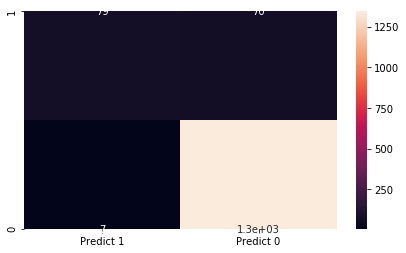

In [73]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels,  labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they take Personal Loan 79

True Negatives (TN): we correctly predicted that they don't take Personal Loan 1.3e+0.3

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 7 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 70 Falsely predict negative Type II error

### Naïve Bayes Classifier Model

In [78]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NN_model = GaussianNB()

NN_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
#Score
model_score = NN_model.score(x_test, y_test) ## 88.4% correct 
print(model_score)
#predict on test
NN_test_y_predict = NN_model.predict(x_test)


0.884


Confusion Matrix


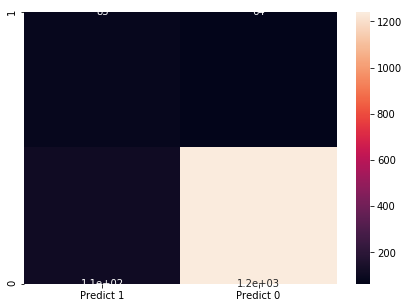

In [82]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, NN_test_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they take Personal Loan 83

True Negatives (TN): we correctly predicted that they don't take Personal Loan 1.2e+0.3

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 11e+02 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 84 Falsely predict negative Type II error

### Give your reasoning on which is the best model in this case and why it performs better? 

In [90]:
## Model Comparison
X=df_loan.drop(['Personal Loan','Experience'],axis=1)
y=df_loan.pop('Personal Loan')

KNN: 0.898600 (0.008902)
Logistic: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


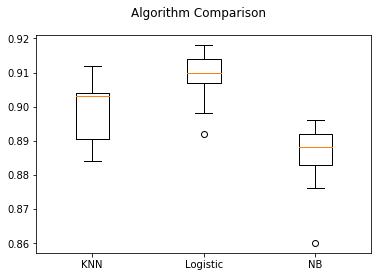

In [93]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Logistic', LogisticRegression(solver="liblinear")))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above graph , we come to conclusion that Logistic Regression algorithm have the highest accuracy and we can choose that as our final model